<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 11 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 15 November 2022</div>


# Introduction to *Graph Theory*

Let's review linear algebra and then apply it to **graphs**. Sometimes data does not come in the form of a spreadsheet, but in the form of a graph!

<br />
<center>
<img src="ipynb.images/ecology.jpg" width=700 />
</center>

<div style="text-align: right; color: gray">6</div>

# 1. Review: Eigenvalues, eigenvectors, Markov Chains, and Google

### What are eigenvectors?

* A Matrix is a mathematical object that acts on a (column) vector, resulting in a new vector, i.e. $A\;\underline{x}=b$. It represents a **move**, in any direction, for a mountain-climber.
* An **eigenvector** is a resulting vector from that same transformation $A$, that is also parallel to **x** (some multiple of **x**). It's as if the **new position** of the mountain climber is **in the same direction** as defined by his previous position and the origin (where he started his climb).
$$ {A}\underline{x}=\lambda \underline{x} $$
$\lambda$ is its **eigenvalue**. It's **how *much*** the mountain climber moved from the previous position.


### What are eigenvalues?

Given $A \in \mathbb{R}^{n\times n}$, $\lambda$ is the **eigenvalue** of $A$ if there is a non-zero vector $x$, the corresponding **eigenvector**, such that the following is true:

$$Ax = \lambda x, \;\; \text{for} \; x \neq 0$$

Is there a move that can take a mountain-climber to *some factor* times his original position? 

If so, the old position is an eigenvector, and the moving factor is its eigenvalue.

### What's a Markov Chain?

A **Markov chain** is any *memorlyess* process that can be modeled with a *stochastic transition* matrix. It's like a mountain climber that always forgets her previous position, and only cares about the next given the current (which is the right state of mind if you're climbing *El Capitan* in Yellowstone National Park!).

Conjecture: If the transition matrix $P$ of a state machine is the same after each step (time homogeneous), then the k-step transition probability is.. the k-th power of the transition matrix, $P^k$. And so, the k-step transition is characterized by the matrix $A^k$.

Now, for the remainder, let's assume our state machine is probabilistic (a.k.a stochastic), and each state corresponds to a superposition of possible states (some more probable than others), and the next state is described by the vector describing the previous state times the transition matrix. We are essentially describing a [quantum system](https://en.wikipedia.org/wiki/Quantum_state), but also a game of chance as a [stochastic process](https://en.wikipedia.org/wiki/Stochastic_process).

### What is steady state?

Now what if, in the long term, after many powers of $k$, we suddenly transition to a condition where the states don't change very much? Well, we acheive what is called a **steady-state** condition: 

$$P^{\;k+1} = P^{\;k}$$

Stationary distributions are super-interesting to Wall Street, because they **describe the *future***! Suppose we call that future the state vector $\pi$. Then:

$$P \; \pi = \pi$$

Hey, wait a second, does that equation remind you of anything?

### What is the dominant eigenvector?
The eigenvectors $X_1, \cdots X_n$ of $n$ x $n$ matrix $A$, and its associated eigenvalues $λ_i$, are such that:

$$A X_i = λ_i X_i$$

And so the future, described as state vector $\pi$, is the eigenvector associated with the eigenvalue 1. 

We know eigenvectors are **basis vectors**, and so any state can be expanded as a linear combination of the eigenvectors of the transition matrix of our state machine.

And since the transformation of a general state vector can be reduced yo a linar combination of the transformation of its basis vectors, let's pick the eigenvectors of the transition matrix and see what happens.

Each application of the transition matrix to any eigenvector adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would catapult the mountain climber to the moon! So, there must not be any eigenvalue strictly larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero, and the mountain climber would **never move**.

So, ***there must be at least one eigenvalue greater or equal to one!***

The **dominant eigenvector** (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the **steady-state limit (the *long-term future*) of the Markov chain**!

The dominant eigenvector will become the *only unsuppressed contribution* to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every **linear system** tends to.

So if we start with a random vector (random mountain climber position), and apply the transition (**Twist**) matrix a million times, we will ultimately converge to the dominant eigenvector, since all other eigenvalue-to-the-power-a-million contributions will become suppressed, after a million transitions. 

Google realized that this corresponds to the steady state condition of a silver surfer surfing the Web through its hyperlinks. It descibes the probabilistic future state of the sliver surfer. If you rank all of its states from highest probability to lowest probability, it's the Google search page for your search query (corresponding to a silver surfer surfing for Web pages relevant to your query terms)! It's the method used by Google to rank the WWW!

# 2. Exercises

### Exercise 1

Let's use the `sympy` package.
```
pip install sympy
```

Find the eigenvalues and eigenvectors of the square of the following matrix as well as the inverse of the matrix minus the identity matrix

$$ {A}=\begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & -2 \\ 0 & 1 & 4 \end{bmatrix} $$

In [1]:
import sympy as sp
A = sp.Matrix([[1, 2, 3], [0, 1, -2], [0, 1, 4]])
A

Matrix([
[1, 2,  3],
[0, 1, -2],
[0, 1,  4]])

In [2]:
# eigenvalues
A.eigenvals()

{3: 1, 2: 1, 1: 1}

In [4]:
# eigenvectors
A.eigenvects()

[(1, 1, [Matrix([
   [1],
   [0],
   [0]])]), (2, 1, [Matrix([
   [-1],
   [-2],
   [ 1]])]), (3, 1, [Matrix([
   [1/2],
   [ -1],
   [  1]])])]

### Exercise 2

Compute the eigenvalues and eigenvectors of the following upper triangular matrix:

In [74]:
A = sp.Matrix([[3, 1], [0, 3]])
A

Matrix([
[3, 1],
[0, 3]])

In [75]:
A.eigenvals()

{3: 2}

We have two eigenvalues, both equal to 3

In [76]:
A.eigenvects()

[(3, 2, [Matrix([
   [1],
   [0]])])]

This matrix has one eigenvector with multiplicity 2. The associated eigenvalue is 3.

### Exercise 3

Look at the following upper triangular matrix

In [79]:
A = sp.Matrix([[3, 1, 1], [0, 3, 4], [0, 0, 3]])
A

Matrix([
[3, 1, 1],
[0, 3, 4],
[0, 0, 3]])

In [80]:
A.eigenvals()

{3: 3}

In [81]:
A.eigenvects()

[(3, 3, [Matrix([
   [1],
   [0],
   [0]])])]

This matrix has one eigenvector with multiplicity 3. The associated eigenvalue is 3, as well!

### Exercise 4

Look at the following matrix

In [6]:
import numpy as np
import scipy as sp
import scipy.linalg as la

A = np.array([[1,2,3],[4,5,6],[7,8,9]])  # Defining the array 

(v, r) = la.eig(A, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 
d = sp.diag(v)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.

print(v)
print(d)
print(r)

[ 1.61168440e+01+0.j -1.11684397e+00+0.j -1.30367773e-15+0.j]
[[ 1.61168440e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.11684397e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.30367773e-15+0.j]]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  


In [7]:
print(la.inv(r)@A@r)

[[ 1.61168440e+01  1.84482529e-15  9.05937978e-16]
 [-4.59865660e-15 -1.11684397e+00  8.38236453e-16]
 [ 3.29331674e-15 -1.20077454e-16 -1.81298661e-16]]


Wow, that's a diagonal matrix with the eigenvalues on the diagonal!

In reality, one never looks for just the inverse matrix. What you typically want is the inverse of a matrix times another matrix or vector, which is the solution to a linear algebra problem. 

We can use `la.solve` to obtain this.

In [8]:
la.solve(r,A)@r

array([[ 1.61168440e+01,  7.57113041e-16, -2.48379192e-15],
       [-4.06855908e-15, -1.11684397e+00,  7.40204519e-16],
       [ 4.44781828e-15, -8.91788754e-16, -2.96059473e-16]])

What is the real value of this matrix?

In [85]:
(la.solve(r,A)@r).round(2)

array([[16.12,  0.  , -0.  ],
       [-0.  , -1.12,  0.  ],
       [ 0.  , -0.  , -0.  ]])

<div style="text-align: right; color: gray">9</div>

## 3. Sparse matrix Representation

**Sparse matrix** representation is very important for **Big Data**. If a matrix is made of mostly zero entries, we need to find more *compact* representations. `scipy.sparse` does this well.

</br >
<center>
<img src="ipynb.images/carcrusher.jpg" width=400 />
</center>

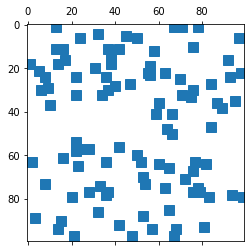

In [3]:
# import scipy module for sparse matrices
import scipy.sparse as sp

# sparse identity matrix
D = sp.eye(100)

# random sparse matrix
R = sp.random(100, 100, density=0.01)

# plot a sparse matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(R)

<div style="text-align: right; color: gray">10</div>


# 4. Graphs
Linear algebra with just the math can be boring. It's its *applications* that make it exciting.

So, why do we care about linear algebra? Because linear algebra is the foundational technique for climbing **mountains of data**, and that is what Google did when it conquered the **World-Wide Web**. 

[Sergei Brin](https://en.wikipedia.org/wiki/Sergey_Brin) and [Larry Page](https://en.wikipedia.org/wiki/Larry_Page) asked themselves, how do we climb that big mountain? The found out about linear algebra and applied it to the Web. And i'll show you how they did it.

By the way, this is how [Alex Honnold](https://en.wikipedia.org/wiki/Alex_Honnold) scaled El Capitan in Yosemite National Park in California in 2018. He reached the top of the route without the aid of ropes or safety gear. Read about it [here](https://www.nationalgeographic.com/adventure/features/adventurers-of-the-year/2018/alex-honnold-rock-climber/). Or watch the [movie](https://www.nationalgeographic.com/films/free-solo/) on Netflix.

<br />
<center>
<img src="ipynb.images/elcapitan2.jpg" width=600 />
</center>

<br />
<center>
<img src="ipynb.images/alexhonnold.jpg" width=600 />
</center>

Best way to track a mountain climber is to draw the path the climber takes to climb the mountain. So we essentialy draw a network of **nodes** (positions), and then join them with **edges**. So we draw a **graph**.

</br >
<center>
<img src="ipynb.images/elcapitan.jpg" width=600 />
</center>

</br >
Yes, this is a graph, too. But you might not want to climb this one. It would take a long time, would give you a headache, and you would probably get lost many times over.

</br >
<center>
<img src="ipynb.images/biggraph.jpg" width=400 />
</center>

The two super important matrices you *need to know* (and not confuse) are:

## The Adjacency Matrix
Let's take a look at the **PageRank algorithm**, the algorithm that made Google famous. Its origins are actually in **article citation**. [Here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0134794) are some examples, and [here](https://pdfs.semanticscholar.org/f33f/cdd5a0a5fd8b29e81748463836cad07d5e8c.pdf) too.

Let's play a game.

Suppose you have a graph linking $n$ x $n$ possible positions, and if you can move from one position $i$ to another position $j$, then you enter a 1 in the matrix cell $(i,j)$ and $(j, i)$. 0 otherwise. That matrix is called the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the graph.

Say you want to analyze the relationships between libraries listed on the [Python Package Index](https://pypi.org/), or PyPI, which contains over **one hundred thousand packages**. Holding an adjacancy matrix for this graph, assuming 8-byte labels, would take 
up $8 \left(100 \times 10^3\right)^2 = 8 \times 10^{10}$ bytes, or 80GB,
of RAM. Do you have that much RAM on your computer? Bet you don't.

How about [github](https://github.com/)?

You might also want to analyze the Association for Computing
Machinery (ACM) citation graph, a [network](https://dl.acm.org/) of over *two million scholarly works
and references*. *That* adjacency matrix, for 8-byte labels, would take up 32 terabytes of RAM.

## The Transition Matrix

That is the matrix that gives us possible moves, from one position to another. If we have a Markov chain of a game (like our Moody's ranking of world economies we mentionned above), then that matrix is **stochastic** and the results are viewed from a *probabilistic perspective*. 

Suppose you have this stochastic transition matrix:

<br />
<center>
<img src = ipynb.images/moody.png width = 600 />
    Moody's credit rating transitions
</center>

You can assume, for practical purposes, that the state of a country is not one of the states above, but a linear combination thereof. So, $\alpha_1$ times AAA plus $\alpha_2$ times AA, etc. If you take the vector [$\alpha_i$], to find the economic state transition of such a country, you just multiply its vector by the Moody matrix. That gives you a new vector, the new state of the country.

When these matrices are *big*, how do we represent them?

## Sparse Matrix Representation
We know that the dependency and reference graphs are *sparse*:
packages usually depend on just a few other packages, not on the whole of PyPI.
And papers and books usually only reference a few others, too. So the vast majority of the adjacency matrixes for the graphs referenced above are made up of **zeros**. So we can hold these adjacency matrices using the sparse data structures from `scipy.sparse`, and use the linear algebra functions in `scipy.sparse.linalg` to compute the values we need. 

More than anything else, [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) matrix representations is *the* **tool** that allows you to handle computations like the ones mentioned above.

</br >
<center>
<img src="ipynb.images/tools.jpg" width=400 />
</center>

Note however that there *are* things we cannot do, even with sparse matrices. For example, the inverse of a sparse matrix is, in general, *not sparse*. Similarly, you can't get all the eigenvectors of a gigantic sparse matrix (even though you *can* express and view a gigantic sparse matrix), because eigenvectors would together make up a **dense** matrix.

# 5. PageRank as a Markov Chain

Ok, so by now we know that linear algebra is all about **vectors** (ordered collections of numbers) and their transformations by multiplying them with **matrices** (collections of vectors, which rigidly rotate vectors in vector space, or represent state transition transformations if the matrix is stochastic). 

Vectors and matrices are to linear algebra what counting is to probabilities and statistics, and the **eigendecomposition theorem** is linear algebra's analog to *Bayes' theorem* in probabilities and statistics.

We also know how to think of vectors and vector rotations: **climbing a mountain** in $n$ dimensions.

We also know about **Markov chains**: memoryless state machines with interesting steady-state properties, like the game of Monopoly. Monopoly is when we can't move *wherever* we want on the mountain. Only from ***one*** specific position to ***another*** specific position. 

And if there's randomness involved, which you should be comfortable with by now since we learned all about probabilities and statistics (i.e. you should be comfortable with fractional values in a matrix instead of 0s and 1s, representing probabilities of moving). Which means, for example, half of the times you move **there**, the other half, **over there instead**. 

There is an amazing **fixed point theorem** for continuous transformations (stems from the
[Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem)),
which states that a stochastic matrix has **1** as its ***largest*** eigenvalue, and that its associated eigenvector, called **dominant**, represents the `long-term steady-state` of the associated state machine: Where you'll end up after millions of state transitions. The dominant eigenvector unlocks the ***long-term*** (steady-state) behavior of Markov Chains. 

The dominant eigenvector also yields the results of your google queries!

<br />
<center>
<img src="ipynb.images/whaat.jpg" width=200 />
</center>

A Google search is nothing more than a search for the dominant eigenvector of your search pattern query on the graph made up by the World Wide Web, which links documents to documents. 

If you can write down the adjacency matrix of the WWW, a 1 in cell $(i, j)$ where $i$ represents http://a.b.c.d and $j$ represents http://e.f.g.h means that page http://a.b.c.d has a link to http://e.f.g.h. 

## Some Graph Concepts


</br >
<center>
<img src="ipynb.images/pagerank.png" width=400 />
</center>

Let's picture a graph, $G$, as an **adjacency matrix**, in which we number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is an edge from node $i$ to node $j$. 

In other words, if we call the adjacency matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$. We
can then use linear algebra techniques to study this matrix.

The **degree** of a node is defined as the number of edges touching it.  For example, if a node is connected to five other nodes in a graph, its degree is 5. In matrix terms, the degree corresponds to the *sum* of the values in a row or column of the adjacency matrix. The degree of a node tells you how "*popular*" that node is, since many other nodes point to it.

In case of **directed** graphs (graph edges have a preferred direction, like hyperlinks in the WWW), number of edges going into a node (as hyperlinks, for example) is known as **indegree** of the corresponding node, while number of edges coming out of a node is known as **outdegree** of the corresponding node.

For each page, you know its oudegree, but its indegree *needs to be computed from the WWW*!

It's easier to understand Google's **PageRank** algorithm for mining the WWW if we start with a simple ecology lab. 

# 6. Graph use case: Food Webs, or who eats whom

</br >
<center>
<img src="ipynb.images/foodwebs.jpg" width=400 />
    yummy yummy..
</center>

To rank Web pages by importance, you count
how many other Web pages link to it. That is the basic logic of the [PageRank](https://en.wikipedia.org/wiki/PageRank) algorithm, which inherits from scientific article citation research.

The key insight that drove Google's early success was that important Web pages are not linked to by just many Web pages, but by *important* Web pages. And how do we know that those other pages are important? Because they themselves are linked to by important pages. And so on. This is a **recursive definition**.

To build a **transition matrix** that contains the probabilities of surfing from one Web page to another, for all pages in the Word Wide Web, would be a daunting task. And yet, that is exactly what Google did.

>**Question**: What would be the dimensions of this matrix? 

These probabilities depend on the hyperlinks contained in each Web page. Thus the transition matrix is a function of the **adjacency matrix** of the WWW graph.

Imagine that the WWW is like the network of roads built by the ancient Romans (in the early days of the WWW, it was exactly like Roman chariot highways, as all WWW nodes eventually linked to central nodes at the University of Illinois in Urbana-Champaign - your instructor remembers these days). If you're a charioteer lost on roman highways, chances are pretty good you'll eventually end up in Rome, right?

<br />
<center>
<img src="ipynb.images/chariot.png" width=300 />
</center>

Ok, chariots may work for Roman roads, but we need something a little bit faster for the WWW.

If you're the silver surfer from the Fantastic Four [movie](https://en.wikipedia.org/wiki/Fantastic_Four:_Rise_of_the_Silver_Surfer), and you're surfing the Web at the speed of light, what sites will you tend to visit *a lot more than others*?

<br />
<center>
<img src="ipynb.images/silversurfer.png" width=200 />
</center>

The ones that most hyperlinks point to the most, right? And if the Silver Surfer only surfs the Web pages relevant to a particular Google word query of yours, the ones returned by the Google search engine, right?

A dominant eigenvector gave us the long-term probabilistic state of a Markov chain.

Similarly, a Google query will give us the Silver Surfer's long-term probabilistic state, with its largest component being the top search result. 

And so the search for $\boldsymbol{r}$, Google's search engine results, is nothing more than the search for the dominant eigenvector of the WWW's transition matrix, listed in descending order (the node with the highest component of the eigenvector is the top search result). 

That's not actually *entirely* correct... The situation is a bit more complicated because a user can also surf to any URL by using the **URL bar**, similarly to how we draw cards in Monopoly to jump from one board square to another very far away. Think of this as *warping through the graph*: You transport from one node to another without having to follow graph edges. 

We have to wait until we write down the silver surfer formula to see that the exact equation looks like. But for now we can assume there is no URL bar :-)

Google initially carried out this computation for the WWW graph on another graph of hundreds of computers, in a distributed fashion, using a mapreduce-style algorithm.

We don't have as much computing power as google in our laptops and our notebooks, but we can probably analyze smaller networks in the same way that Google analyzed the WWW. 

So let's use an example by Stefano Allesina and Mercedes Pascual, which they [published](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000494i) in PLoS Computational Biology. They applied the method to ecological *food webs*, networks that link species to those species they eat.

Think about it as the *dinner web* :-)

Naively, if you wanted to see how *critical* a species was for an ecosystem, you would look at ***how many species eat it***: Is it a primary food source? 

If it's *many*, and that species came to *disappear*, then all its *dependent* species might disappear with it!

In network parlance, you could say that a species' *in-degree* determines its ecological importance.

Here is a food Web from the St Marks National Wildlife Refuge in Florida, in Graph Markup Language format. The web was [described](http://www.sciencedirect.com/science/article/pii/S0304380099000228) in 1999 by Robert R. Christian and Joseph J. Luczovich. In the dataset, a node $i$ has an edge to node $j$ if species $i$ eats species $j$.

Let's load the data, leveraging `networkx`, a Python [package](https://networkx.github.io/) for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks (pretty cool). Click [here](https://networkx.github.io/documentation/networkx-0.37/) for its API. You may have to:
```(python)
pip install networkx
```

Let's also load the data for the experiment, in the Graph Modeling Language (GML) format, a hierarchical ASCII-based file [format](https://en.wikipedia.org/wiki/Graph_Modelling_Language) for describing graphs.

In [10]:
import networkx as nx
stmarks = nx.read_gml('data/stmarks.gml')

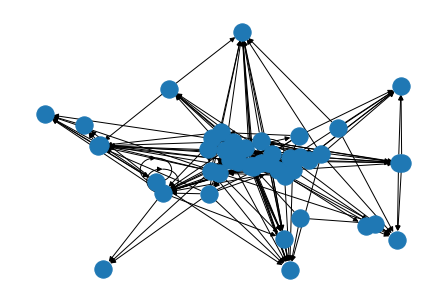

In [11]:
import matplotlib as pl
%matplotlib inline
nx.draw(stmarks,pos=nx.spring_layout(stmarks))

{'fish-eating birds': Text(0.0061098890023989815, 0.10309988268426594, 'fish-eating birds'),
 'atlantic silverside and bay anchovies': Text(-0.0027955501170725296, 0.20625471379591898, 'atlantic silverside and bay anchovies'),
 'macro-epiphytes': Text(-0.9401800429359438, -0.19252825950013527, 'macro-epiphytes'),
 'spot': Text(0.08463197471377337, 0.2087661005328332, 'spot'),
 'brittle stars': Text(0.05462339124656393, -0.18440599626222853, 'brittle stars'),
 'catfish and stingrays': Text(-0.26564731167528777, 0.11299447384520601, 'catfish and stingrays'),
 'predatory polychaetes': Text(0.001611578476916041, 0.021223860117821885, 'predatory polychaetes'),
 'pinfish': Text(0.04494691899764814, 0.027611597973521196, 'pinfish'),
 'killifish': Text(-0.24143209840478294, -0.15608114138343854, 'killifish'),
 'herbivorous ducks': Text(-0.016053999705037666, 0.051930768412206736, 'herbivorous ducks'),
 'other gastropods': Text(0.6148144169121141, -0.4576658802393369, 'other gastropods'),
 'pre

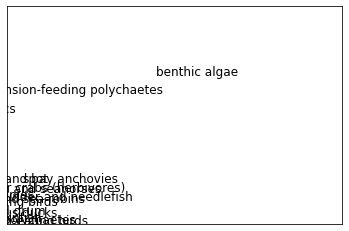

In [5]:
nx.draw_networkx_labels(stmarks,pos=nx.spring_layout(stmarks))

Let's get the adjacency matrix for that graph, in sparse matrix representation. We will use SciPy's `sparse` package for that.  Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

## Adjacency matrix

In [12]:
import pymc3

In [13]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
species = np.array(list(stmarks.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)

C:\Users\HP\AppData\Local\Temp\ipykernel_7960\3414667019.py:5: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)


In [15]:
species

array(['fish-eating birds', 'atlantic silverside and bay anchovies',
       'macro-epiphytes', 'spot', 'brittle stars',
       'catfish and stingrays', 'predatory polychaetes', 'pinfish',
       'killifish', 'herbivorous ducks', 'other gastropods',
       'predatory gastropods', 'deposit-feeding polychaetes', 'raptors',
       'Halodule wrightii', 'gulls', 'epiphyte-grazing gastropods',
       'detritus', 'deposit-feeding peracaridan crustaceans',
       'blue crabs', 'pipefish and seahorses',
       'epiphyte-grazing amphipods', 'bacterioplankton',
       'fish and crustacean-eating birds',
       'suspension-feeding polychaetes', 'sheepshead minnow',
       'phytoplankton', 'zooplankton', 'suspension-feeding molluscs',
       'red drum', 'predatory shrimps', 'benthic algae',
       'benthic bacteria', 'tonguefish', 'hermit crabs',
       'southern hake and sea robins', 'benthos-eating birds',
       'herbivorous shrimps', 'omnivorous crabs', 'meiofauna',
       'microfauna', 'micropr

In [14]:
Adj

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

These are the network's **nodes**:

In [8]:
species

array(['fish-eating birds', 'atlantic silverside and bay anchovies',
       'macro-epiphytes', 'spot', 'brittle stars',
       'catfish and stingrays', 'predatory polychaetes', 'pinfish',
       'killifish', 'herbivorous ducks', 'other gastropods',
       'predatory gastropods', 'deposit-feeding polychaetes', 'raptors',
       'Halodule wrightii', 'gulls', 'epiphyte-grazing gastropods',
       'detritus', 'deposit-feeding peracaridan crustaceans',
       'blue crabs', 'pipefish and seahorses',
       'epiphyte-grazing amphipods', 'bacterioplankton',
       'fish and crustacean-eating birds',
       'suspension-feeding polychaetes', 'sheepshead minnow',
       'phytoplankton', 'zooplankton', 'suspension-feeding molluscs',
       'red drum', 'predatory shrimps', 'benthic algae',
       'benthic bacteria', 'tonguefish', 'hermit crabs',
       'southern hake and sea robins', 'benthos-eating birds',
       'herbivorous shrimps', 'omnivorous crabs', 'meiofauna',
       'microfauna', 'micropr

In [9]:
len(species)

48

In [20]:
import pandas as pd
pd.DataFrame(species[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,fish-eating birds,atlantic silverside and bay anchovies,macro-epiphytes,spot,brittle stars,catfish and stingrays,predatory polychaetes,pinfish,killifish,herbivorous ducks,other gastropods,predatory gastropods,deposit-feeding polychaetes,raptors,Halodule wrightii,gulls,epiphyte-grazing gastropods,detritus,deposit-feeding peracaridan crustaceans,blue crabs


## Transfer matrix

From the **adjacency matrix**, we can derive a **transition** probability matrix, where every 1-edge is replaced by a probability of 1 over the number of outgoing edges from that species. In the food web, it might make more sense to call this a *dinner probability matrix*. This matrix represents your probability of being eaten :-)

</br >
<center>
<img src="ipynb.images/shark.png" width=300 />
</center>

For example, if shrimp is eathen by whales, sharks, tilapia, and humans, then the shrimp-row of the transition matrix for the ***eaten by*** transformation contains $1/4$ for the columns whale, shark, tilapia, human, zeros everywhere else.

The total number of species in our matrix is going to be used a lot, so let's call it $n$:

In [16]:
n = len(species)
Adj

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

To reveal `Adj`, do:

In [22]:
Adj.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, pandas to the rescue!

In [23]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Next, we need the degrees, and, in particular, the diagonal matrix containing the inverse of the out-degrees of each node on the diagonal. Note that numpy's [ravel](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html) returns a view into the existing array (sometimes it returns a copy). [flatten](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html) returns a new array.

Also note, there are several sparse matrix classes in `scipy`. If you want to process big data, these representations are your friends:

* `bsr_matrix(arg1[, shape, dtype, copy, blocksize])` Block Sparse Row matrix
* `coo_matrix(arg1[, shape, dtype, copy])` A sparse matrix in COOrdinate format.
* `csc_matrix(arg1[, shape, dtype, copy])` Compressed Sparse Column matrix
* `csr_matrix(arg1[, shape, dtype, copy])` Compressed Sparse Row matrix
* `dia_matrix(arg1[, shape, dtype, copy])` Sparse matrix with DIAgonal storage
* `dok_matrix(arg1[, shape, dtype, copy])` Dictionary Of Keys based sparse matrix.
* `lil_matrix(arg1[, shape, dtype, copy])` Row-based linked list sparse matrix

Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability, which can be very dangerous, but also useful sometimes: `np.seterr(divide='ignore')`.

In just two lines of python, we obtain out-degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the out-degree for that node:

In [17]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

Since adjacency matrices are often sparse, and filled with only ones, plotting them cam be quite informative. Let's write a matrix plotting function.

In [18]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the out-degrees of each node, and the food Web matrix, too.

C:\Users\HP\AppData\Local\Temp\ipykernel_7960\882878923.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


<Figure size 432x288 with 0 Axes>

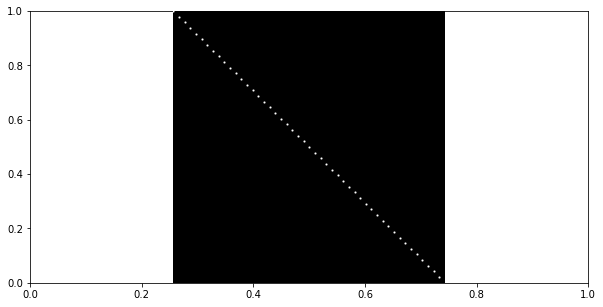

In [19]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7960\3391399585.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


<Figure size 432x288 with 0 Axes>

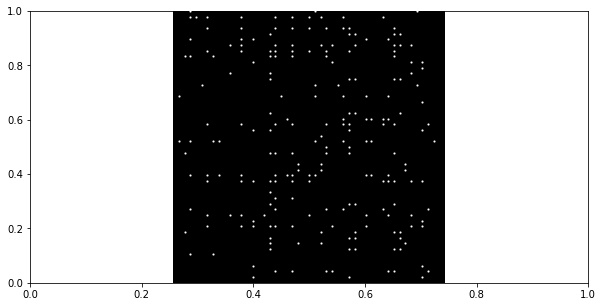

In [20]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with out-degrees on the right margin:

In [21]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too hard!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[000100000000000000000000010000000000000000010000]] 3
[[000110100000100000100100101000100000010000000000]] 10
[[000000000000000000000000000000000000000000000000]] 0
[[000000100000100000100100100100110000000100000000]] 9
[[000000000000000001000000000000011000000110000000]] 5
[[000100000000101000000000000000000010001000000000]] 5
[[000000000010100000100100001010001000000110100000]] 10
[[000000100000100001100100100100010000000100000000]] 9
[[001100010000000001100100000100000000000100000000]] 8
[[000000000000001000000000000010000000000000101000]] 4
[[000000000000000000000000000000000000000000001000]] 1
[[000000000010000001000000000000000000000000100000]] 3
[[000000000000000001000000000000011000000110000000]] 5
[[000001000000000000000000010001000000000000010000]] 4
[[000000000000000000000000000000000000000000000000]] 0
[[010000000000000000010000010000100010001000000000]] 6
[[000000000000000000000000000000000000000000001000]] 1
[[000000000000000000000000000000000000000000000000]] 0
[[000000

C:\Users\HP\AppData\Local\Temp\ipykernel_7960\2731532498.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numbers =[ np.vectorize(np.int)(x) for x in row ]


And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor!

In [22]:
Trans = (Deginv @ Adj).T
Trans

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [23]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33333333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        ]])

### Search for the Dominant Eigenvector

If the Google search engine unleashes the silver surfer on our Food Web network, and since he surfs at the speed of light, he totally finds the most linked pages, the way Romans on chariots find Rome. 

We don't surf at the speed of light, but Prof. Dino told us about the dominant eigenvector, so we know all we need to do is find the eigenvector associated with the eigenvalue = 1, for the graph's transition matrix (don't confuse *transtion matrix* with *adjacency matrix*).

And the dominant eigenvector's components give us the PageRank score of each node! All we need to do is to rearrange the vector's components with the highest component first, 2nd highest 2nd, etc, and then return that sorted eigenvector to the user. That is what Google does with your search queries! 

If we call the transition matrix $M$ and the vector of PageRank values (dominant eigenvector) $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$

## Fixing a little problem
For the silver surfer to be able to search every page, *every* page must be reachable from every other page. 

Our food web is problematic (we say *degenerate* in linear algbra): The bottom of the food chain, what the authors call *detritus* (basically *sea sludge*), doesn't actually *eat* anything, it's garbage. So you *can't reach other species from it*! Oh no!

</br >
<center>
<img src="ipynb.images/mufasa.gif" width=400 />
</center>

> *Young Simba:* But, Dad, don't we eat the antelope?
>
> *Mufasa:* Yes, Simba, but let me explain. When we die, our bodies become the
> grass, and the antelope eat the grass. And so we are all connected in the
> great Circle of Life.
>
> — *The Lion King*

That is why our browsers **have a browser bar**, where the user enters a URL to surf directly to a page (maybe we get that URL from word-of-mouth). So that way, we *can* get to any Web page. In fact, Google did some research that uncovered that about 85% of the time, we just follow links, and 15% of the time, we enter URLs. So we modify the PageRank algorithm with a so-called **damping factor**, usually taken to be 0.85. 

This means that 85% of the time, the silver surfer follows a link at random but with well-defined probabilities (in the same way a random sampling from a Normal distribution will give us a random-looking process but with well-defined probabilities leading to a normal distribution for its histogram), but for the other 15%, it randomly jumps to any *arbitrary* page. It's as if every page had a low probability link to every other page even if the two pages don't link to each other through hyperlinks, because you can always get to the other page by typing its URL in the URL bar. 

In our case, it's as if shrimp, on rare occasions, ate sharks :-)

If we call the damping factor $d$, and $\boldsymbol{1}$ is the Identity matrix, then the *modified* PageRank equation that assumes that every network node can be reached from any other is:

$$
\boldsymbol{r} = dM\boldsymbol{r} + \frac{1-d}{n} \boldsymbol{1}
$$

or:

$$
(\boldsymbol{I} - dM)\boldsymbol{r} = \frac{1-d}{n} \boldsymbol{1}
$$

I call this equation the **silver surfer formula**, and it shows you the contribution of your URL bar to search results. 

>**Note**: That is the reason why Google works so hard to make Chrome the *best browser* and gives it out ***for free***: It needs to **spy** on your URL bar so that it can keep refining the dominant eigenvector for the World Wide Web (have you noticed how aggressive Google has been lately every time we give it a query with another browser?)!

<br />
<center>
<img src="ipynb.images/chrome.png" width=400 />
</center>

We can solve the silver surfer formula using `scipy.sparse.linalg`'s direct solver, `spsolve`, *because our graph is pretty small, much smaller than the WWW*. 

Depending on the structure and size of a linear algebra problem, though, it might be more efficient to use an iterative solver. 

See the `scipy.sparse.linalg` [documentation](http://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems) for more information on iterative solvers.

Let's solve the silver surfer formula *exactly* for our food Web (small emough of a matrix), using `scipy.sparse.linalg.spsolve`:

In [24]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each species:

In [25]:
import pandas as pd
in_degrees = np.ravel(Adj.sum(axis=0))
for i, (s, d, p) in enumerate(zip(species, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 fish-eating birds (0.0) 0.0031250000000000006
1 atlantic silverside and bay anchovies (2.0) 0.003862847222222223
2 macro-epiphytes (3.0) 0.006600489539708688
3 spot (8.0) 0.00851913395634404
4 brittle stars (1.0) 0.0034533420138888895
5 catfish and stingrays (1.0) 0.0037890625000000008
6 predatory polychaetes (8.0) 0.00671863139327715
7 pinfish (3.0) 0.005798698933919272
8 killifish (2.0) 0.003688530815972223
9 herbivorous ducks (0.0) 0.0031250000000000006
10 other gastropods (3.0) 0.004913531585095225
11 predatory gastropods (0.0) 0.0031250000000000006
12 deposit-feeding polychaetes (10.0) 0.007933855686705708
13 raptors (0.0) 0.0031250000000000006
14 Halodule wrightii (8.0) 0.012545984081857815
15 gulls (0.0) 0.0031250000000000006
16 epiphyte-grazing gastropods (1.0) 0.003457031250000001
17 detritus (15.0) 0.03364348083239245
18 deposit-feeding peracaridan crustaceans (13.0) 0.010376963089850342
19 blue crabs (1.0) 0.003567708333333334
20 pipefish and seahorses (2.0) 0.003898817274

How does a species' foodrank compare to the number of other species eating it? Let's write a function to scatter-plot PageRank versus in-degree for named nodes.

In [26]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of predators)')

We pre-label some interesting nodes in the plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


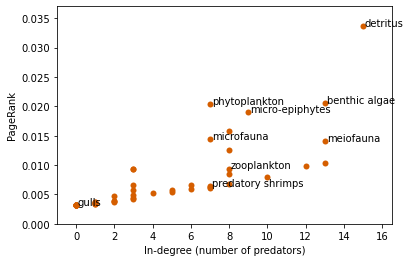

In [27]:
interesting = ['detritus', 'phytoplankton', 'benthic algae', 'micro-epiphytes',
               'microfauna', 'zooplankton', 'predatory shrimps', 'meiofauna',
               'gulls']
in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, species, annotations=interesting)

Sea sludge ("detritus") is the most important element both by number of species feeding on it (15) and by PageRank (>0.003). But the second most important element is *not* benthic algae, which feeds 13 other species, but rather phytoplankton, which feeds just 7! That's because other *important* species feed on it. 

Web pages' PageRank works the same way!

So, on the bottom left, we've got sea gulls, who, we can now confirm, eat everything in the ecosystem. They are the vacuum machines of nature! And those vicious *predatory shrimps* support the same number of species as phytoplankton, but they are less essential species, so they end up with a lower foodrank.

Allesina and Pascual go on to model the ecological impact of species extinction, and indeed find that PageRank predicts ecological importance really well. Interesting article!

PageRank can actually be computed several different ways. One way is what we did above, with math. Another way is called the
*power method*, and is an **approximation**. This is actually what Google first did, and what made `mapreduce()` famous because PageRank was implemented mapreduce-style. That's because solving *exactly* a system of linear equations with dimension equal to the WWW would be... unfeasible. Would take much too long!

## The Power Method

But what to do with *huge* transition matrices, like the one for the WWW?

We know from the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem),
that a stochastic matrix has 1 as an eigenvalue, and that this is its *largest* eigenvalue (the corresponding
eigenvector is the dominant or PageRank vector). What this means is that, whenever we
multiply *any* vector $v$ by $M$, the component of $v$ pointing towards the dominant
eigenvector stays the same, while *all other components shrink* by a
multiplicative factor. 

The corollary is that if we multiply some random
starting vector by $M$ repeatedly, we should eventually get the PageRank
vector since all other components will eventually shrink to zero!

SciPy makes this very efficient with its sparse matrix module:

In [37]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

Let's go back to matrix `Trans`.

Recall that a transition matrix needs to be *column-stochastic*, in which all column entries sum to 1:

In [38]:
rows = 0
for i in range(48):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 8


oopsie..

</br >
<center>
<img src="ipynb.images/oops.jpg" width=100 />
</center>

Let's take a peek..

In [39]:
for i in range(48):
    print(np.sum((Trans.todense().T)[i]))

1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9999999999999999
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9999999999999999
1.0


In order to have a **stochastic** matrix, all columns of the transition matrix must sum to 1 (all probabilities need to sum up to 1). This is not satisfied when a species isn't eaten by *any* others: that column will consist of all zeroes! 

Above, we have 8 rows that sum to 0. We call these *dangling nodes*. Replacing columns in that row by arbitrary 1/n so that the row sum becomes 1 csounds like an attriactive fix, but it could be an expensive operation if our matrix has large dimensions.

An efficiency is to realize that every dangling row will contribute the same amount to the multiplication of the transition matrix by the current probability vector. That is to say, considering the column of a dangling row will add a single value to the result of the multiplication of `Trans` by a state vector $r$. What value?  1/n times the element of  $r$  that corresponds to that dangling row. For all dangling rows, this can be expressed as a dot-product of a vector containing  1/n for positions corresponding to dangling nodes (and zero elswhere) with the state vector  $r$  for the current iteration. So we can write:

In [40]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

You can try this out manually for a few iterations. Notice that if you start with a
stochastic vector (a vector whose elements all sum to 1), the next vector will
still be a stochastic vector. Thus, the output PageRank from this function will
be a true probability vector, and the values will represent the probability
that we end up at a particular species when following links in the food chain.

To verify that these three methods all give the same ranking for the
nodes. `numpy.corrcoef` might be a useful function for this.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [41]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Let's double-check:

In [42]:
for i, (pr, prp, prp2) in enumerate(zip(pagerank, pagerank_power, pagerank_power2)):
    print(i, pr, prp, prp2, prp/prp2)

0 0.0031250000000000006 0.0031250000000000006 0.008660797633909728 0.36082126982908014
1 0.003862847222222223 0.0038628472222222232 0.01070570512813968 0.3608213729022692
2 0.006600489539708688 0.006600491479577001 0.018292979872656746 0.3608210103288323
3 0.00851913395634404 0.00851913395634404 0.023610385384364208 0.3608214697751511
4 0.0034533420138888895 0.0034533420138888895 0.00957078193783686 0.36082130345447994
5 0.0037890625000000008 0.0037890625000000008 0.010501214378716687 0.36082136440138535
6 0.00671863139327715 0.006718631393277151 0.018620396854801064 0.36082106335691905
7 0.005798698933919272 0.0057986989339192715 0.016070829121059813 0.3608213919915582
8 0.003688530815972223 0.0036885308159722227 0.010222596084373958 0.3608213398561675
9 0.0031250000000000006 0.0031250000000000006 0.008660797633909728 0.36082126982908014
10 0.004913531585095225 0.004913531585095225 0.013617633692462565 0.3608212481009011
11 0.0031250000000000006 0.0031250000000000006 0.008660797633909

2nd highest PageRank? *Phytoplankton*, or *Benthic algae*.

<br />
<center>
<img src="ipynb.images/algae.jpg" width=400 />
</center>


# 7. Conclusion

We introduced linear algebra with `NumPy` and `SciPy`, explored graphs with linear algebra concepts, and evaluated important attributes of graphs such as the PageRank of each node. We did on a simple ecosystem what Google did to the WWW. Doesn't this make you want to explore the facebook graph, or something similar?

This notebook should also give you an idea of the power of `SciPy` and its elegant algorithms. It should make you want to explore `SciPy`, especially before any assignment, to figure out what methods you can leverage from it. Also, if you interiew with Google or Facebook, you *will* get at least one graph-related question. So you need to know *everything* in this notebook.


### References
* [PageRank](https://en.wikipedia.org/wiki/PageRank)
* [MapReduce](https://en.wikipedia.org/wiki/MapReduce)
* [T-SQL MapReduce](https://www.codeproject.com/Articles/627421/T-SQL-MapReduce)